## Assignment

In this assignment, we will derive and simulate the kinematic model for the alphabot using differential driven dynamics. By definition, **differential driven dynamics** refers to the motion of a system actuated by two separately driven wheels on either sides.  Note the following figure of a differential robot model.

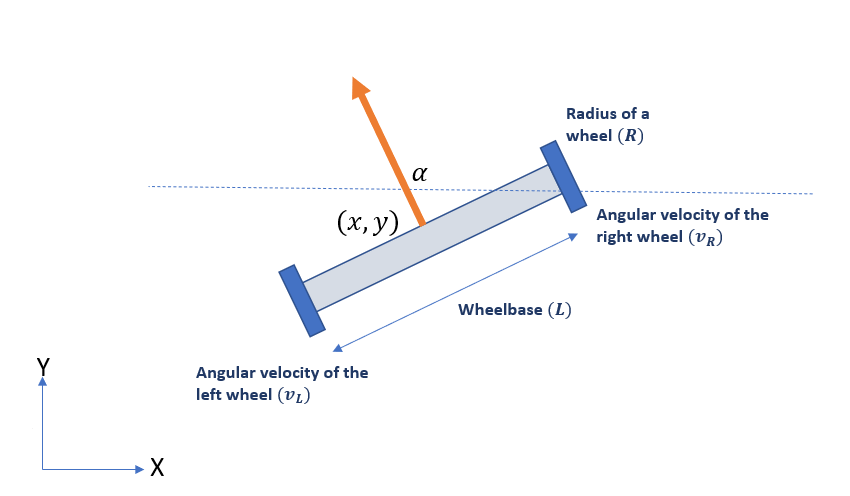

In [4]:
from IPython.display import Image # Load image from local storage
Image(filename = "diff_driven.png", width = 600, height = 300)

**Part (a)**
Consider the configuration of the robot in the format  $[x,y,\alpha]^T$,
where $x,y$ are the $X$ and $Y$ coordinates of the robot's centroid in the cartesian plane and, $\alpha$ is the heading direction of the robot measured from the positive $X$ axis. Derive the differential equations for this dynamic model to update the 3 states. The final equations should look like the following.
$$\dot{x} = \frac{R}{2}(v_L + v_R)cos(\alpha)$$

$$\dot{y} = \frac{R}{2}(v_L + v_R)sin(\alpha)$$

$$\dot{\alpha} = \frac{R}{L}(v_R - v_L)$$

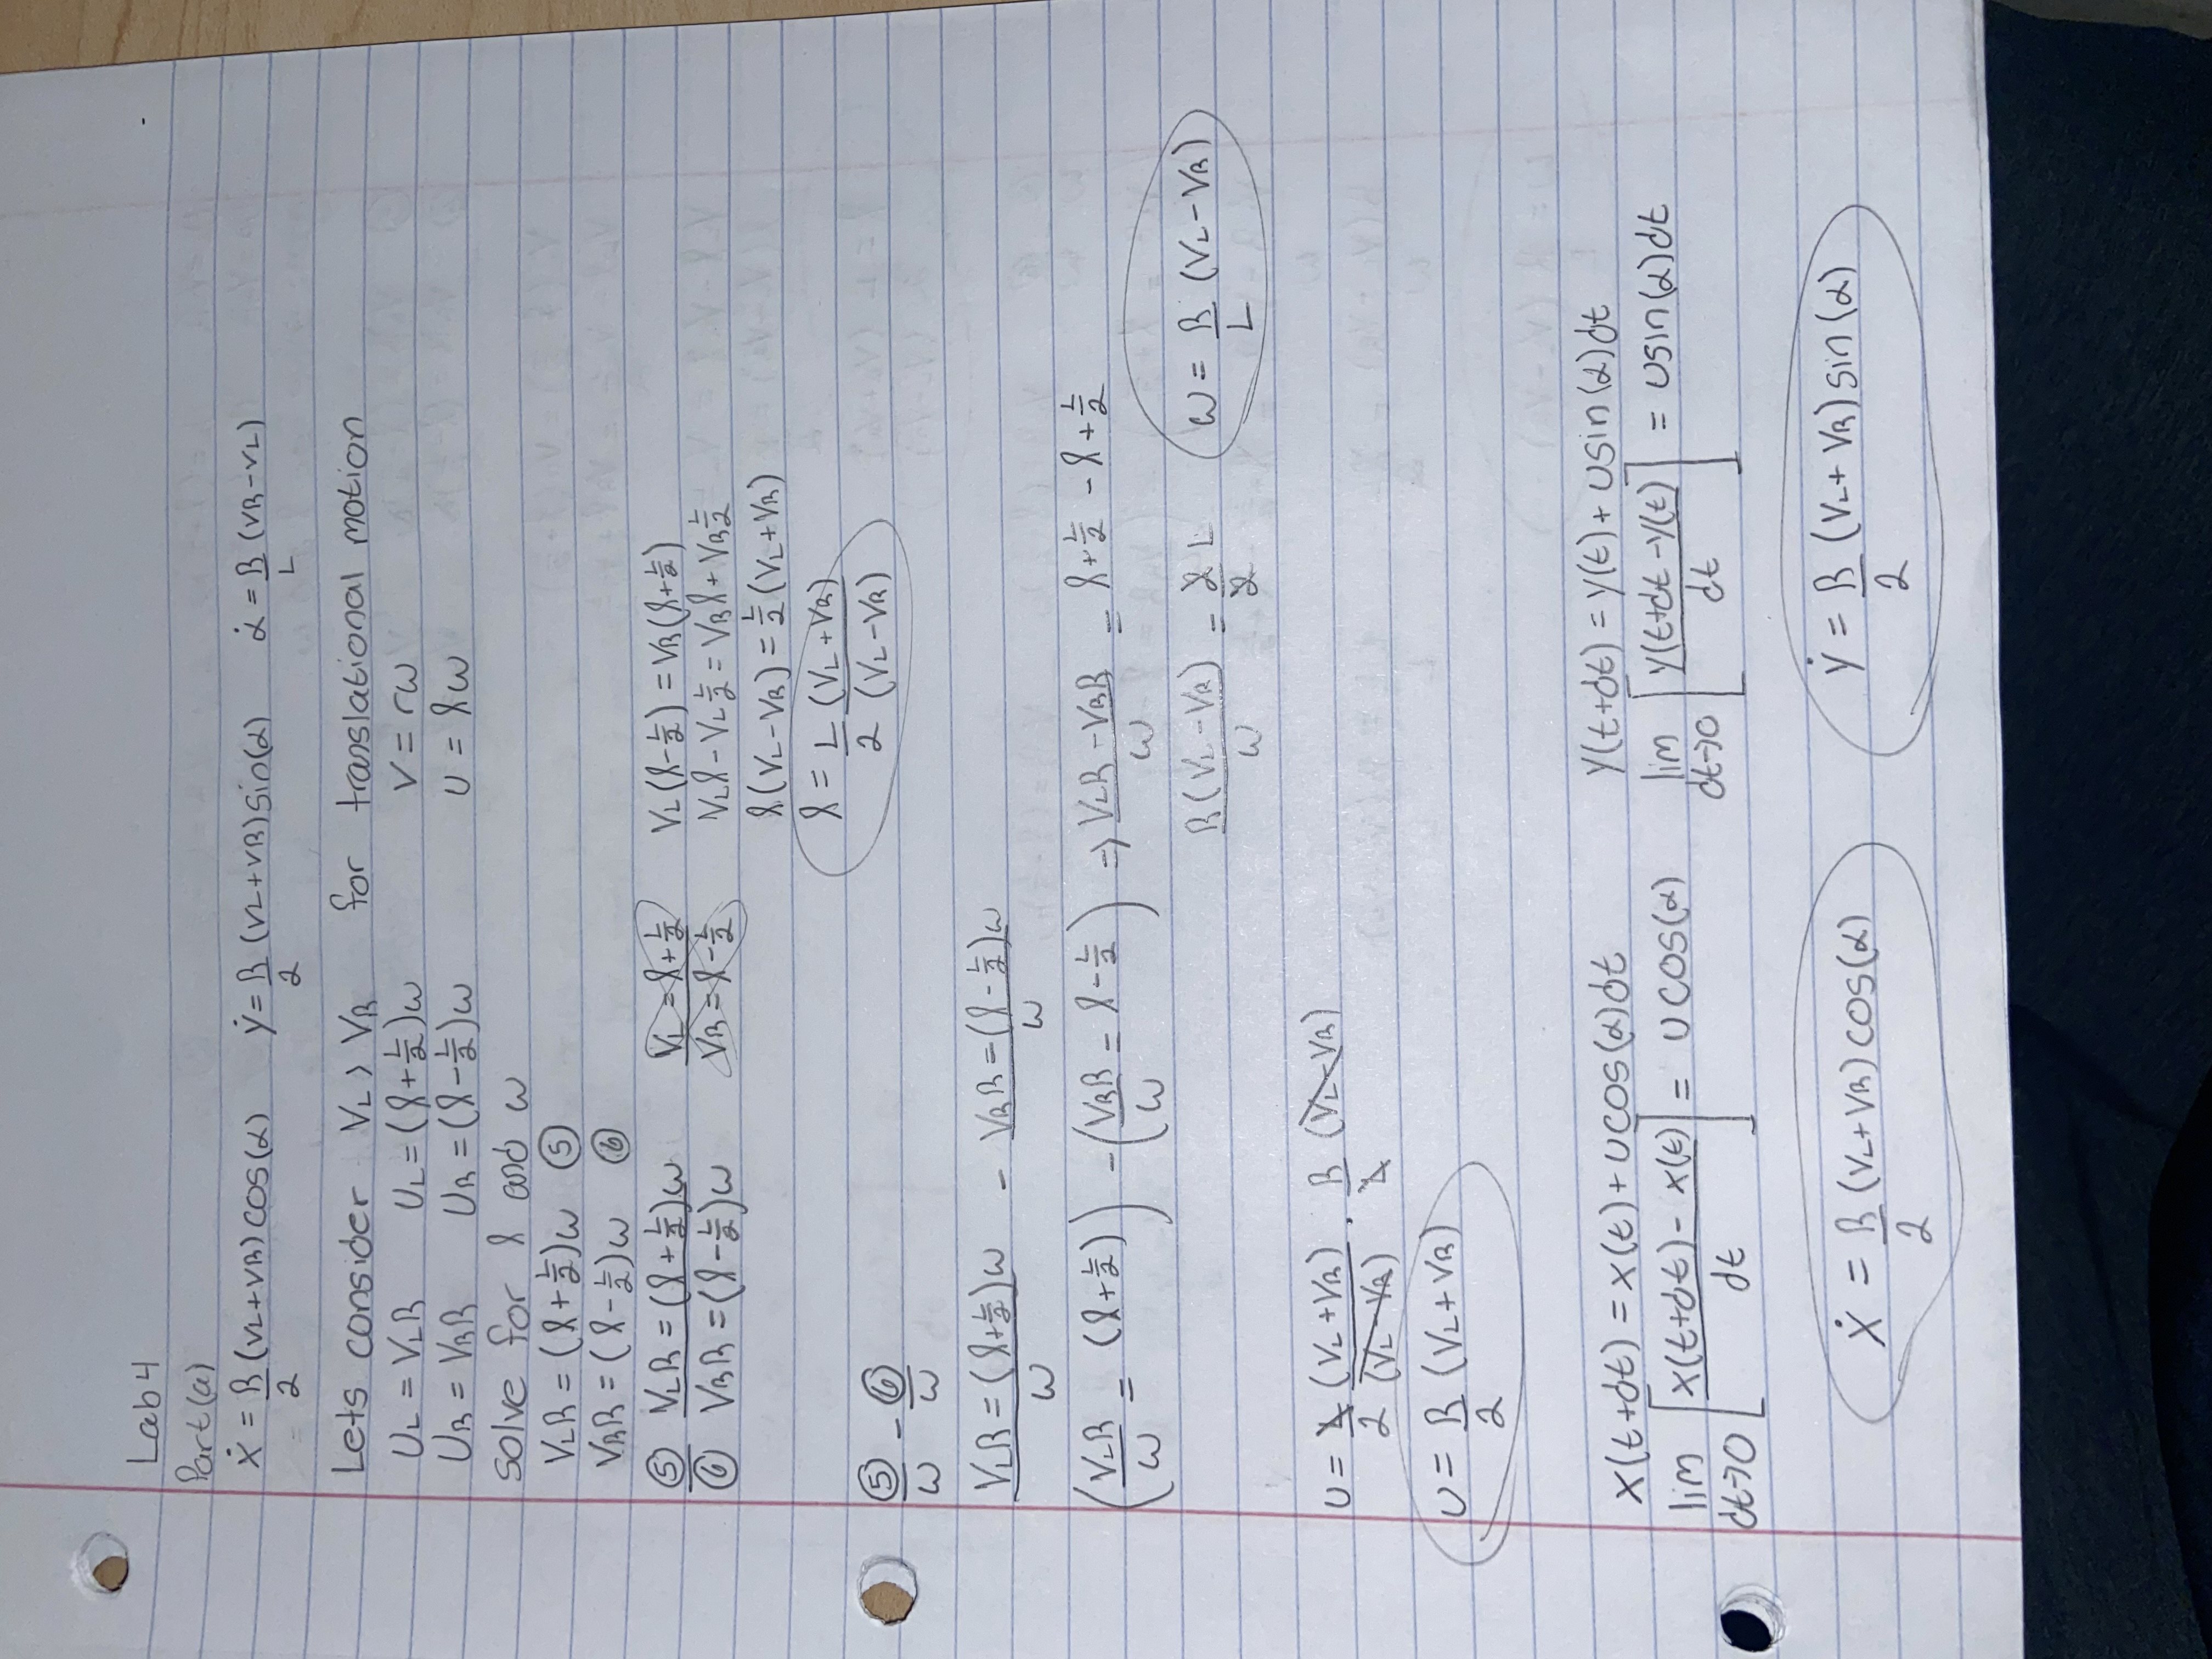

In [6]:
Image(filename = "pic0.jpg", width = 600, height = 800)

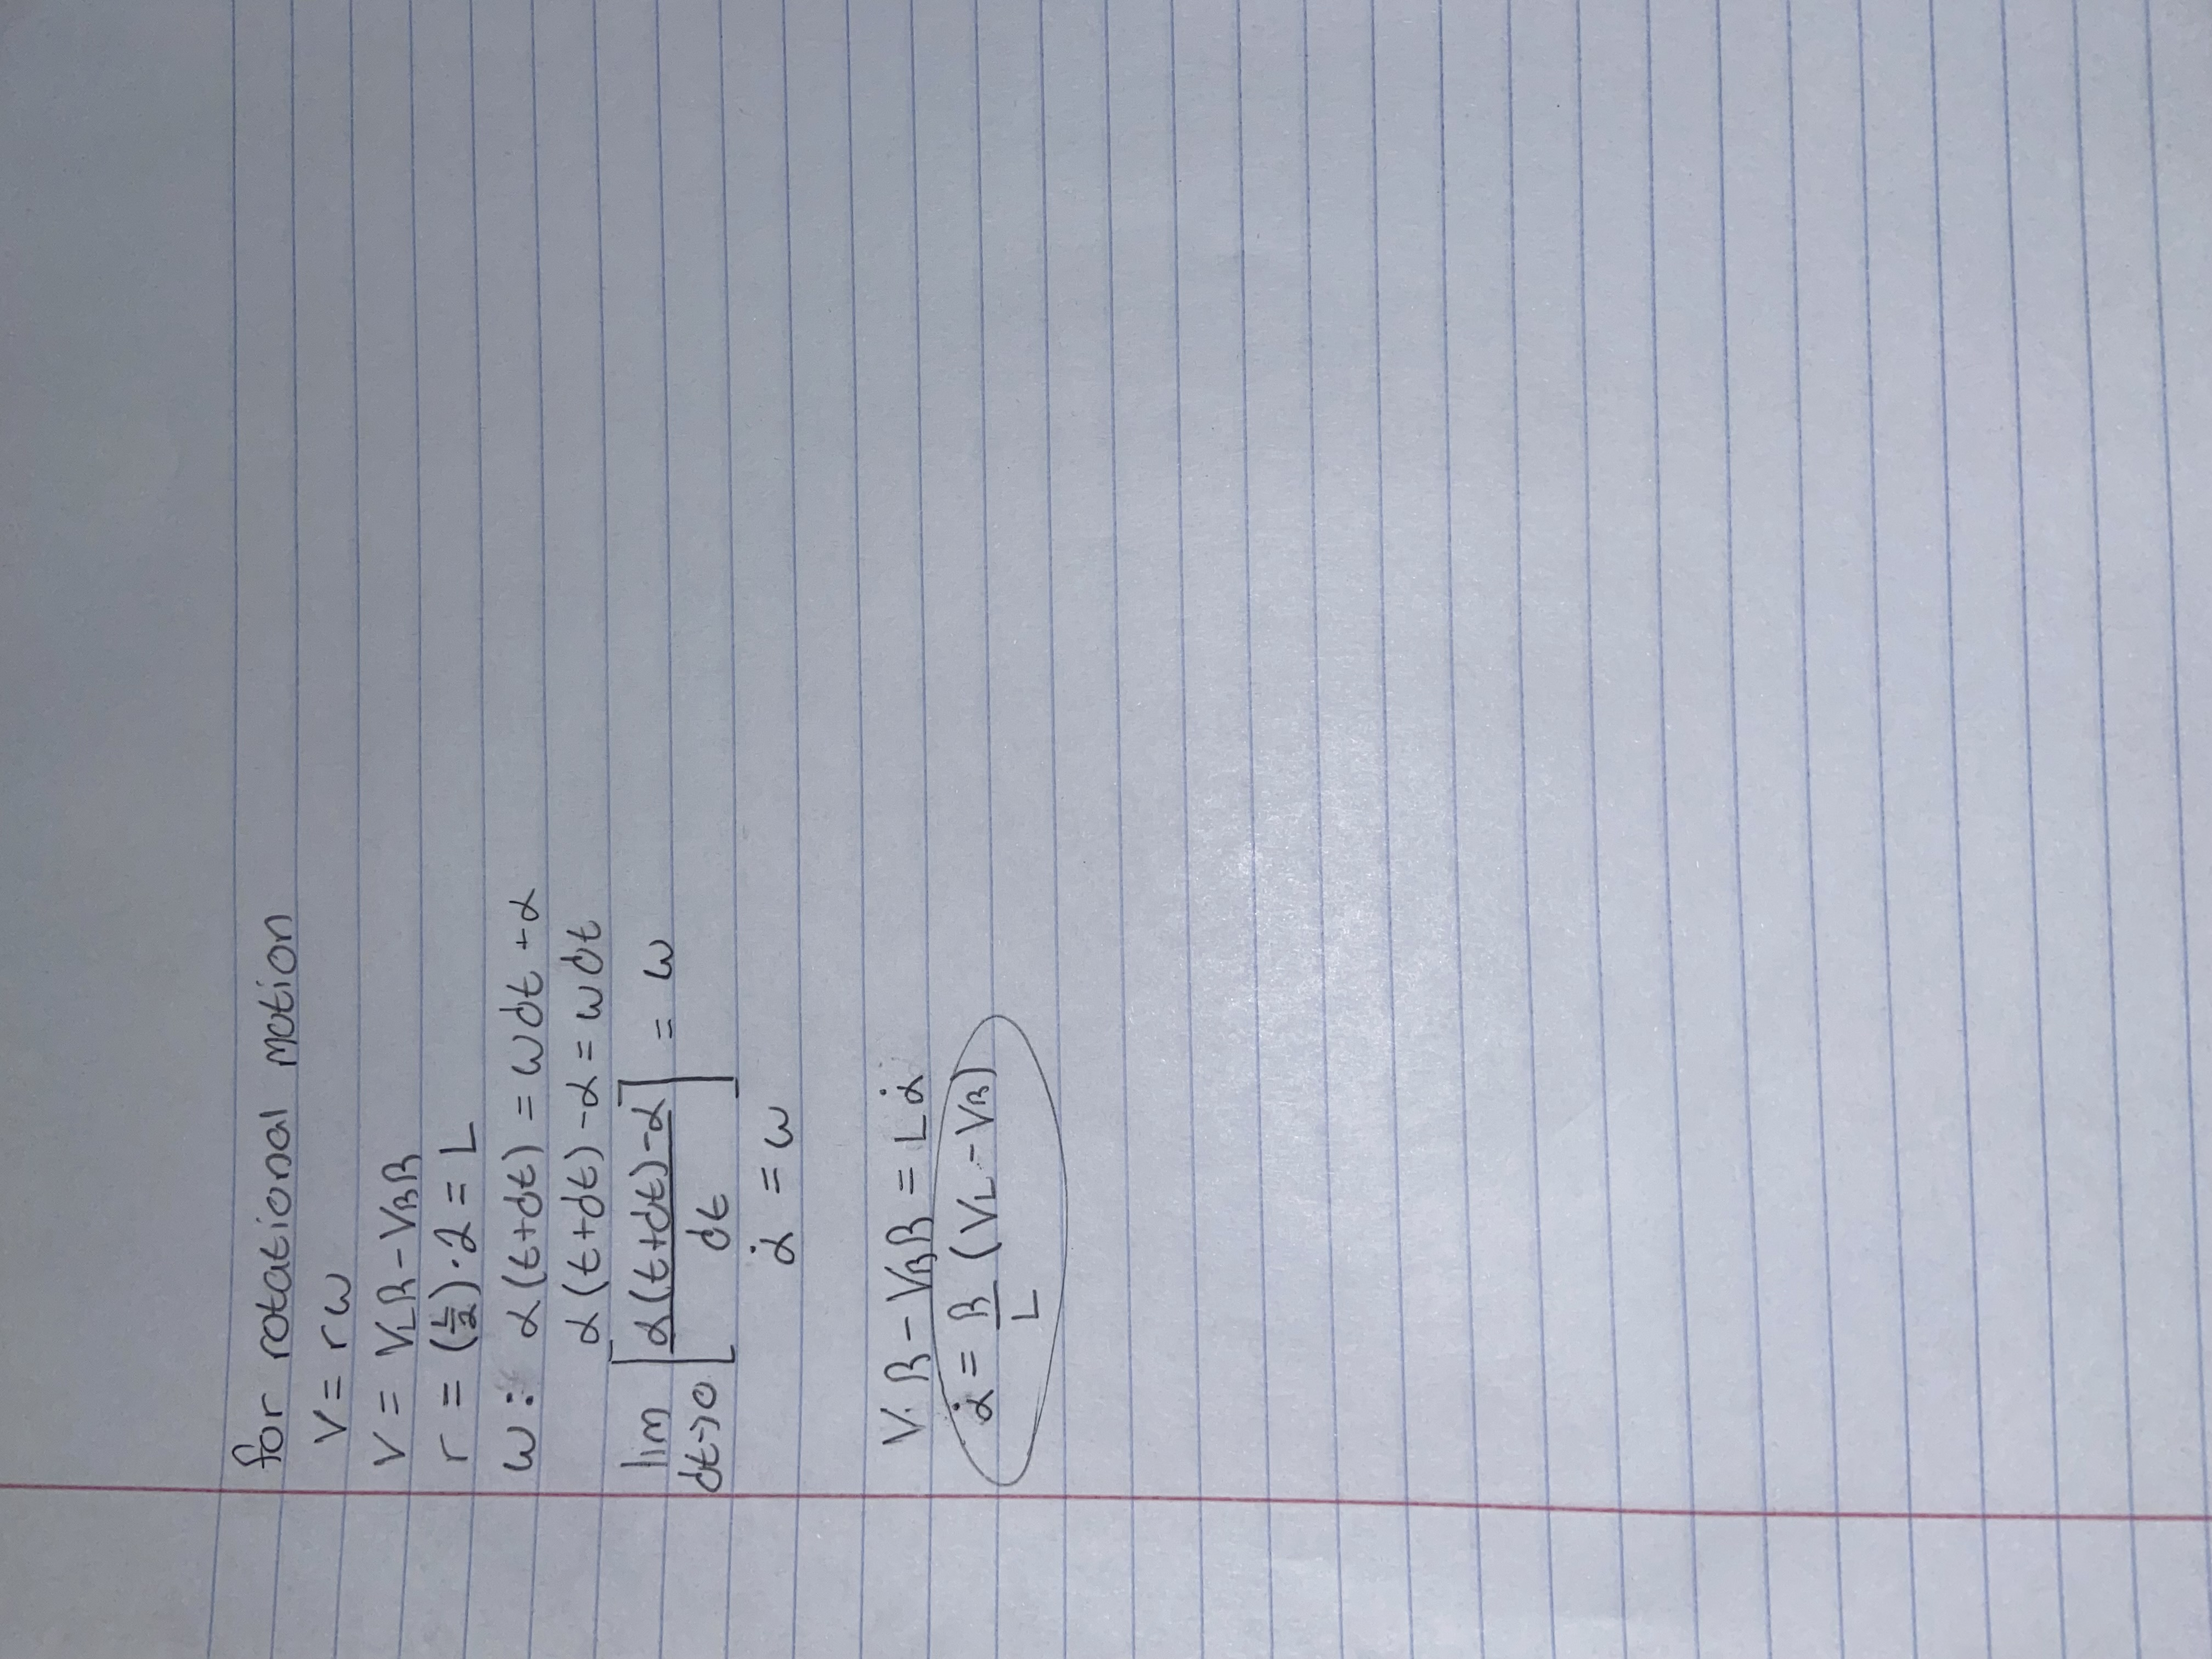

In [7]:
Image(filename = "pic1.jpg", width = 600, height = 800)

**Part (b)** Implement the dynamic model using python. Include all the differential equations inside a single function called $f$. Obtain $L$ and $R$ parameters by measuring the alphabot.

In [9]:
def f(z, t, Vr, Vl):
    R = 0.02  # radius of wheels (meters)
    L = 0.11  # length between wheels (meters)

    dx = (R / 2) * (Vl + Vr) * m.cos(z[2])
    dy = (R / 2) * (Vl + Vr) * m.sin(z[2])
    d_theta = (R / L) * (Vr - Vl)

    fdot = [dx, dy, d_theta]
    return fdot 

**Part (c)** Pass $f$ to the ODEINT solver and simulate the system for 5 seconds by using $[x=0,y=0,\alpha=0]^T$ and $v_R = 1$, $v_L=2$ as the initial conditions. Plot the displacement values and angle over time.
(Refer to the particle dynamics on a 2D plane simulation code as an example.)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.99999697e-04 -2.72727057e-07 -1.81818182e-03]
 [ 5.99998422e-04 -1.09090739e-06 -3.63636364e-03]
 ...
 [ 1.29621061e-01 -6.29050407e-02 -9.03636364e-01]
 [ 1.29806474e-01 -6.31408840e-02 -9.05454545e-01]
 [ 1.29991458e-01 -6.33770641e-02 -9.07272727e-01]]


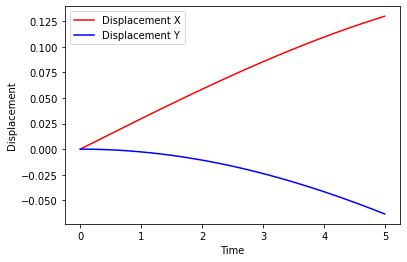

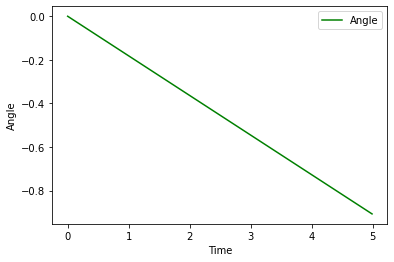

In [10]:
from scipy.integrate import odeint
import numpy as N
import pylab as p
import math as m 


y0 = [0, 0, 0]  # initial value

t = N.arange(0, 5, 0.01)  #simulate the system for 5 seconds
f_val = odeint(f, y0, t, args=(1, 2))

p.figure(0)
p.plot(t, f_val[:,0],'r', label='Displacement X')
p.plot(t, f_val[:,1],'b', label='Displacement Y')
p.xlabel('Time')
p.ylabel('Displacement')
p.legend(loc='best')

p.figure(1)
p.plot(t, f_val[:,2],'g', label='Angle')
p.xlabel('Time')
p.ylabel('Angle')
p.legend(loc='best')

print(f_val)

**Part (d)** Lets define a trajectory for the robot by changing the angular velocity of the wheels at different timesteps. 

$$t = 0, v_R = 3, v_L = 1 $$

$$t = 5, v_R = 1, v_L = 3 $$

$$t = 10, v_R = 3, v_L = 1 $$

$$t = 15, v_R = 5, v_L = 5 $$

Visualize the robot and its path as it moves along this trajectory in real-time. (Use a rectangular shape to represent the robot).

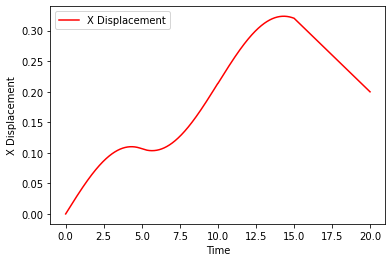

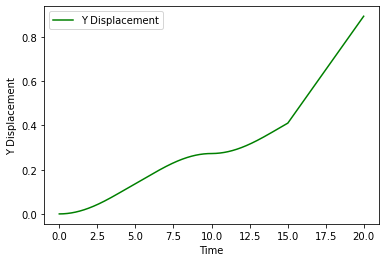

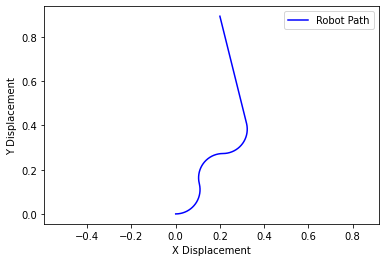

In [11]:
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
import pylab as p
import numpy as N
import time

y0 = [0,0,0]
t0 = N.arange(0, 5, 0.01)
f_val0 = odeint(f, y0, t0, args=(3, 1))

y1 = f_val0[-1, :]  # row: last row, col: all
t1 = N.arange(5, 10, 0.01)
f_val1 = odeint(f, y1, t1, args=(1, 3))

y2 = f_val1[-1, :]
t2 = N.arange(10, 15, 0.01)
f_val2 = odeint(f, y2, t2, args=(3, 1))

y3 = f_val2[-1, :]
t3 = N.arange(15, 20, 0.01)
f_val3 = odeint(f, y3, t3, args=(5, 5))

x_data, y_data, t_data = [], [], []

for i in range(2000):
    if i >= 0 and i < 500:
        x_data.append(f_val0[:,0][i])
        y_data.append(f_val0[:,1][i])
        t_data.append(f_val0[:,2][i])
    if i >= 500 and i < 1000:
        x_data.append(f_val1[:,0][i-500])
        y_data.append(f_val1[:,1][i-500])
        t_data.append(f_val1[:,2][i-500])
    if i >= 1000 and i < 1500:
        x_data.append(f_val2[:,0][i-1000])
        y_data.append(f_val2[:,1][i-1000])
        t_data.append(f_val2[:,2][i-1000])
    if i >= 1500 and i < 2000:
        x_data.append(f_val3[:,0][i-1500])
        y_data.append(f_val3[:,1][i-1500])
        t_data.append(f_val3[:,2][i-1500])

t0 = N.arange(0, 20, 0.01)

p.figure(0)
p.plot(t0, x_data, 'r', label='X Displacement')
p.xlabel('Time')
p.ylabel('X Displacement')
p.legend(loc='best')
p.show()

p.figure(1)
p.plot(t0, y_data, 'g', label='Y Displacement')
p.xlabel('Time')
p.ylabel('Y Displacement')
p.legend(loc='best')
p.show()

p.figure(2)
p.plot(x_data, y_data, 'b', label='Robot Path')
p.xlabel('X Displacement')
p.ylabel('Y Displacement')
p.legend(loc='best')
p.axis('equal')
p.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


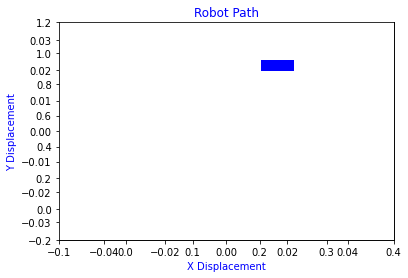

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.animation import FuncAnimation

x = x_data
y = y_data
yaw = t_data

fig = plt.figure()
plt.title("Robot Path", color='b')
plt.xlabel("X Displacement", color='b')
plt.ylabel("Y Displacement", color='b')
plt.axis('equal')
plt.grid()
ax = fig.add_subplot()
ax.set_xlim(-0.1, 0.4)
ax.set_ylim(-0.2, 1.2)

patch = patches.Rectangle((0, 0), 0.05, 0.075, fc='b')

def init():
    ax.add_patch(patch)
    return patch,

def animate(i):
    patch.set_xy([x[i*10], y[i*10]])
    patch._angle = -np.rad2deg(yaw[i])
    return patch,

anim = FuncAnimation(fig, animate, 
                     init_func=init, 
                     frames=200, 
                     interval=20, 
                     blit = True)
                     
anim.save('robot_path.gif')